In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - Lab4_Data
# AUTHOR - James
# PROJECT - AST 2050 Lab 4
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Data analysis for Lab 4
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np
import sys, os, pdb, importlib

## Plotting
from matplotlib import pyplot as plt

## Project-specific notebook
sys.path.append('../src/')
import ast2050.lab4 as l4

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Look at the data

In [4]:
# Read data
data1 = l4.read_tiff('./data/April15/Neon_1.tiff')[515:535,0:350]

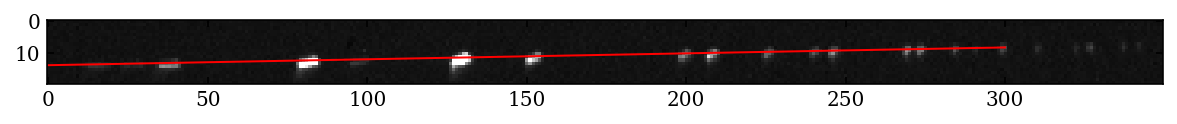

In [10]:
spine_m = -0.0185558078597321
spine_b = 528.7260342144174

fig = plt.figure( figsize=(10,10) )
plt.imshow(data1, vmin=0, vmax=255)
plt.plot( np.array([0,300]), spine_m*np.array([0,300])+spine_b-515, color='Red', linewidth=1.0 )
plt.show()